In [33]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import threading

In [25]:
class ARGS:
    def __init__(self):
        self.t = 1e-500
        self.cv = 12
args = ARGS()

In [39]:
gene = {}
with open('./cm.out', 'r') as f:
    ref = []
    for line in tqdm(f.readlines()):
        line = line.strip().split('\t')
        if line[0] == line[1] : 
            ref = []
        if float(line[2]) <= args.t:
            ref.append(line[1])
            gene[line[0]] = ref

100%|████████████████████████████████████████████████████████████████████| 6595465/6595465 [00:03<00:00, 1674988.93it/s]


In [40]:
for k1, v1 in tqdm(gene.items()):
    for ve1 in v1:
        if k1 == ve1 : continue
        for k2, v2 in gene.items():
            for j, ve2 in enumerate(v2):
                if {k2 : ve2} == {ve1 : k1} :
                    # print({k1 : ve1}, {k2 :ve2})
                    del gene[k2][j]

100%|█████████████████████████████████████████████████████████████████████████████| 27737/27737 [10:04<00:00, 45.86it/s]


In [42]:
gene_n = list(map(len, gene.values()))
gene_cv = {}
for e1, e2 in zip(gene.keys(), gene_n): gene_cv[e1] = e2

In [49]:
max(gene_cv.values())

111

In [43]:
cv = {}
for i in range(1, args.cv+1): cv[i] = 0
for v in gene_cv.values():
    if v >= args.cv : cv[args.cv] += 1
    else : cv[v] += 1

In [44]:
cv_df = pd.DataFrame(cv, index=['number'])
cv_df

,1,2,3,4,5,6,7,8,9,10,11,12
number,15194,7448,2043,1070,557,372,225,162,126,68,63,409


In [45]:
palette = sns.color_palette('Purples')[0:args.cv]

In [46]:
list(cv_df.loc['number'])

[15194, 7448, 2043, 1070, 557, 372, 225, 162, 126, 68, 63, 409]

In [47]:
labels = deepcopy(list(range(1, args.cv)))
labels += [f'>={args.cv}']

([<matplotlib.patches.Wedge at 0x7fab0ae6f7d0>,
 [Text(-0.16452429513483158, 1.0876266621917592, '1'),
  Text(-0.45550335858506286, -1.0012575544372826, '2'),
  Text(0.6639854296224625, -0.8769967783572948, '3'),
  Text(0.9259907502035336, -0.5937517415027068, '4'),
  Text(1.019110570622342, -0.4140213096518157, '5'),
  Text(1.0569579194224963, -0.30469649911029145, '6'),
  Text(1.0751298898155774, -0.2325848662857165, '7'),
  Text(1.0842888454166861, -0.1852503703233813, '8'),
  Text(1.0897538033427077, -0.1497886781439224, '9'),
  Text(1.0927817998204732, -0.12580913313876513, '10'),
  Text(1.0945281413861256, -0.10958169424604373, '11'),
  Text(1.0988199174624038, -0.050939071329541105, '>=12')],
 [Text(-0.08974052461899903, 0.5932509066500503, '55%'),
  Text(-0.24845637741003426, -0.5461404842385177, '27%'),
  Text(0.3621738707031613, -0.4783618791039789, '7%'),
  Text(0.5050858637473818, -0.3238645862742037, '4%'),
  Text(0.555878493066732, -0.22582980526462673, '2%'),
  Text(0.57

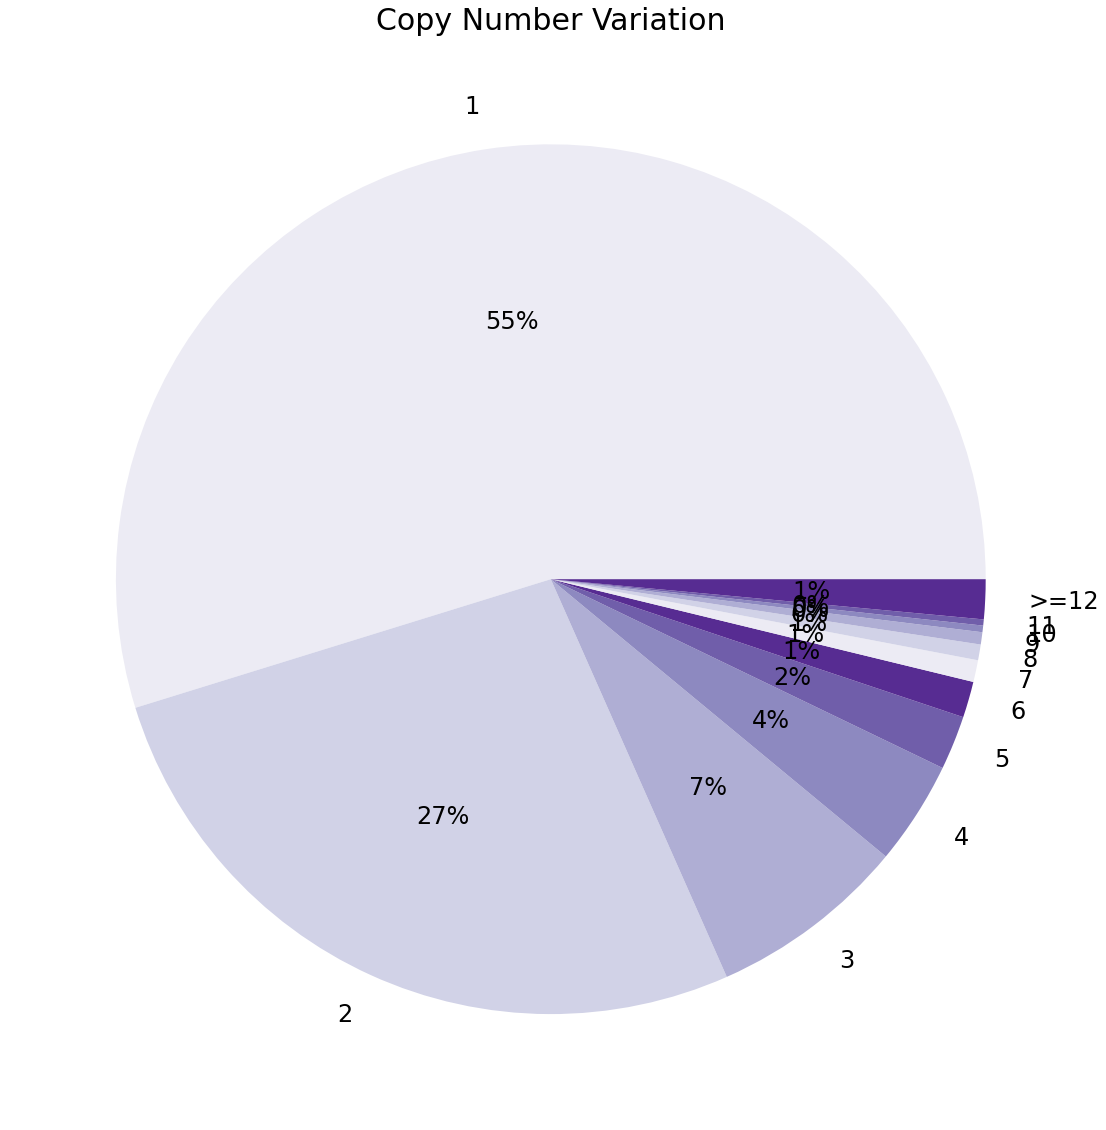

In [48]:
fig, axes = plt.subplots(figsize=(40, 20))
axes.set_title('Copy Number Variation')

axes.title.set_size(30)

plt.pie(list(cv_df.loc['number']), labels = labels, colors = palette, autopct='%.0f%%', textprops={'fontsize': 24})